In [1]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('datasets_1256_2242_train.csv')
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [7]:
x = df['x'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)

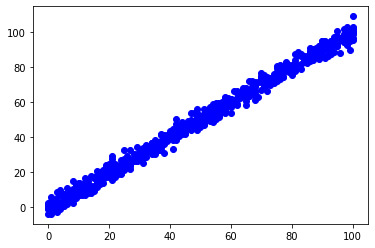

<Figure size 7200x7200 with 0 Axes>

In [11]:
plt.scatter(x, y, c ="blue") 
plt.figure(figsize=(100.00,100.00))
plt.show() 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
X_train.size


559

In [15]:
X_test.size

140

# Linear Regression

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
linear_score=model.score(X_test, y_test)

In [18]:
linear_score

0.9916592070219102

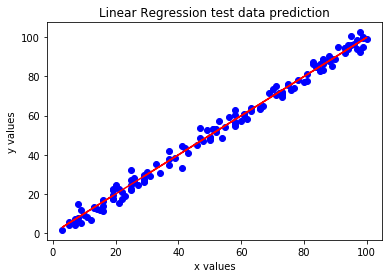

In [24]:
plt.scatter(X_test, y_test,color='blue')
plt.plot(X_test, model.predict(X_test),color='red')
plt.title('Linear Regression test data prediction') 
plt.xlabel('x values') 
plt.ylabel('y values')
plt.show()

# polynomial regression

In [42]:
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(x)  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

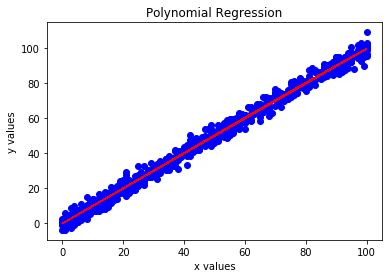

In [51]:
plt.scatter(x, y, color = 'blue') 
plt.plot(x, lin2.predict(poly.fit_transform(x)), color = 'red',linewidth=1) 
plt.title('Polynomial Regression') 
plt.xlabel('x values') 
plt.ylabel('y values') 
plt.show() 


In [49]:
lin2.intercept_, lin2.coef_

(array([-0.21737973]),
 array([[ 0.00000000e+00,  9.99317266e-01,  1.10065469e-04,
          1.86021709e-06, -3.22784899e-08]]))

# Ridge Regression

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [54]:
ridge=Ridge()
parameters={'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [55]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-7.953827600675487


another method

In [58]:
ridge_re=Ridge(alpha=40)

In [59]:
ridge_re.fit(X_train, y_train)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [60]:
ridge_re.score(X_train,y_train)

0.990409794495711

In [61]:
ridge_re.fit(x,y)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [62]:
ridge_re.score(x,y)

0.9907015272742177

score for train data 0.990409794495711 ______

score for all data:-0.9907015272742177

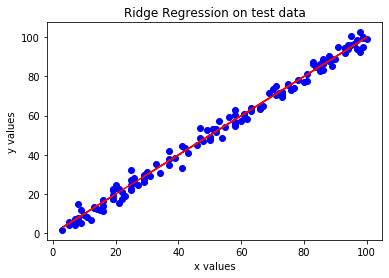

In [63]:
plt.scatter(X_test, y_test,color='blue')
plt.plot(X_test, ridge_re.predict(X_test),color='red')
plt.title('Ridge Regression on test data') 
plt.xlabel('x values') 
plt.ylabel('y values')
plt.show()

In [64]:
#score on the test data
ridge_re.score(X_test, y_test)

0.9917068951957453

In [66]:
from sklearn import metrics


In [70]:
print('Root Mean Squared Error for Linear regression :', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))


Root Mean Squared Error for Linear regression : 2.7479975801256598


In [72]:
print('Root Mean Squared Error for ridge regression :', np.sqrt(metrics.mean_squared_error(y_test, ridge_re.predict(X_test))))


Root Mean Squared Error for ridge regression : 2.740130532105524
